# Load and Segment Continuous EEG Data

In [1]:
import numpy as np
import mne # load necessary modules
import matplotlib.pyplot as plt

In [2]:
# Determine location of sample file or data
sample_data_folder = "../files"
sample_data_file = f"{sample_data_folder}/S001/S001R03.edf"

## Read in raw data; raw objects

In [3]:
# Read raw data using mne
raw = mne.io.read_raw_edf(sample_data_file, preload=True)

Extracting EDF parameters from /Users/rusham/Documents/VinjamuriLabTings/ClassificationProject/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


## Enabling Digitization Points
digitization points - 3D coordinates of the electrode locations on the scalp are necessary for plotting topographic maps of independent components (ICs)

This will be useful when conducting Independent Component Analysis (ICA) to generate topographic maps of various locations of different EEG signal components.

Running the code snippet below will show that we do not have any digitization points information.

In [4]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


As you can see, it is labeled `chs: 64 EEG` which tells us that we have 64 channels but does not specify the 3D locations or digitization points of these channels. The code below will add this information

In [5]:
from mne.channels import make_standard_montage

# rename the current channel names to match what make standard montage method is looking for
new_names = {ch_name: ch_name.strip('.').upper() for ch_name in raw.info['ch_names']}

new_names['Fcz.'] = "FCz"
new_names['Cz..'] = 'Cz'
new_names['Cpz.'] = 'CPz'
new_names['Fp1.'] = "Fp1"
new_names['Fp2.'] = "Fp2"
new_names["Afz."] = "AFz"
new_names['Fpz.'] = "Fpz"
new_names['Fz..'] = "Fz"
new_names['Pz..'] = 'Pz'
new_names['Poz.'] = 'POz'
new_names['Oz..'] = "Oz"
new_names['Iz..'] = 'Iz'


raw.rename_channels(new_names)

# Apply the 10-10 montage (this is standard for 64 channels)
montage = make_standard_montage('standard_1020')  # change to standard_1020 if using the 10-20 system

# Apply the montage
raw.set_montage(montage)

# Optionally, remove any channels that are excluded
# (e.g., A1, A2, F9, F10, etc., based on the description)
# These channels excluded by the dataset I am using

# excluded_channels = ['NZ', 'F9', 'F10', 'FT9', 'FT10', 'A1', 'A2', 'TP9', 'TP10', 'P9', 'P10']
# raw.drop_channels(excluded_channels)

# Now the EEG data has the appropriate montage applied


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

Mine is object oriented. Objects have corresponding methods. Check `raw.` to see different methods that can be used from `raw`

In [6]:
dir(raw) #shows you what kind of methods the raw data has

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_get_duration_string',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_raw_extras',

In [7]:
help(raw.filter) # gives helpful information regarding methods
# parameters and description

Help on method filter in module mne.io.base:

filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=None,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None
) method of mne.io.edf.edf.RawEDF instance
    Filter a subset of channels/vertices.

    Parameters
    ----------

    l_freq : float | None
        For FIR filters, the lower pass-band edge; for IIR filters, the lower
        cutoff frequency. If None the data are only low-passed.

    h_freq : float | None
        For FIR filters, the upper pass-band edge; for IIR filters, the upper
        cutoff frequency. If None the data are only high-passed.
    picks : str | array-like | slice | None
        Channels to include. Slices and lists of integers will be interpreted as
        channel indice

In [8]:
# apply a bandpass filter that gets rid of frequencies
# below 8Hz and greater than 30Hz

raw.filter(8, 30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

In [9]:
# apply a notch filter to filter out power line noise (60 Hz)
raw.notch_filter(60)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

### Cleaning Data

Many (eye blink, heart rhythms) artifacts exist. We will use ICA (Independent Component Analysis) to correct these. For this, we create an ICA object and use `.fit` method on a filtered copy of the raw data

In [10]:
# instantiate ICA object from mne library
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [11]:
# fit the raw data to the ica object
ica.fit(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.7s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,49 iterations on raw data (20000 samples)
ICA components,20
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


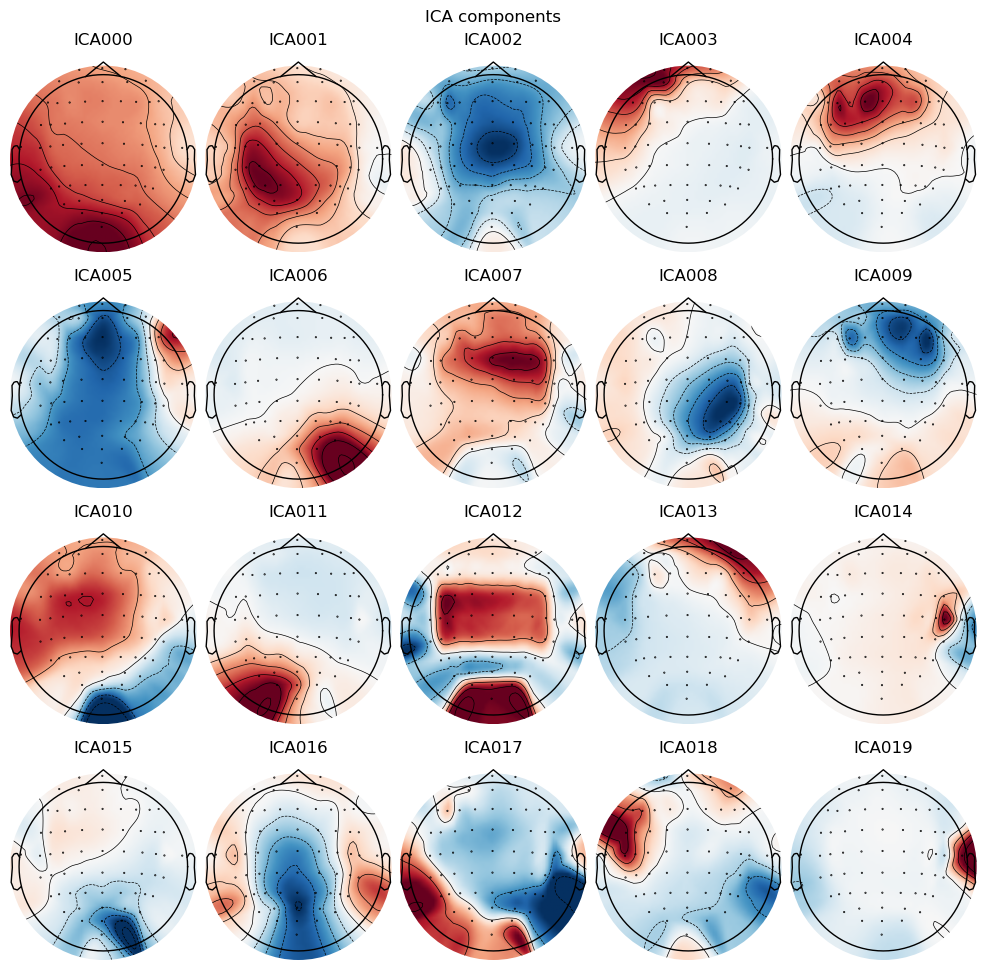

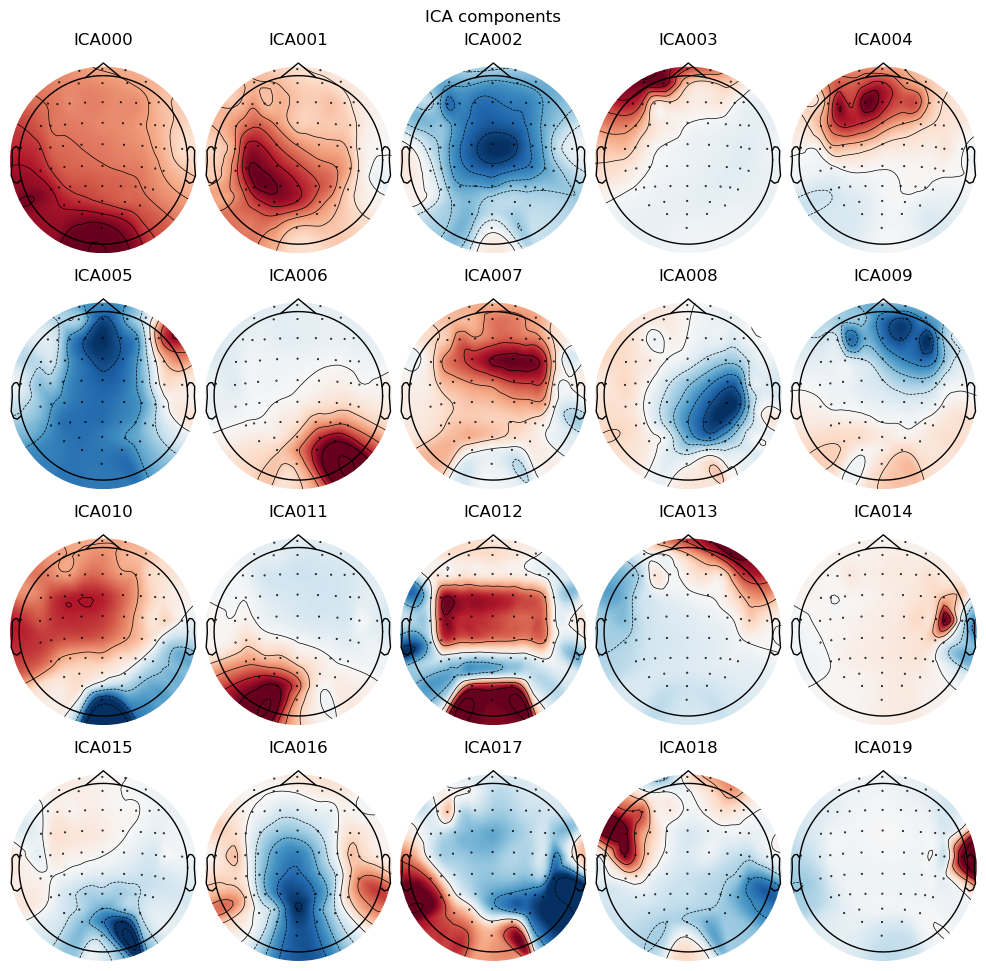

In [12]:
ica.plot_components()

In [13]:
# We store 'bad' components in the ica object
bad_idx, scores = ica.find_bads_eog(raw, ['C4', 'C3'], 2)

Using EOG channels: C4, C3
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [14]:
ica.exclude = bad_idx

In [15]:
# Apply ICA filter
ica.apply(raw, exclude=ica.exclude)

# save file
raw.save(sample_data_file[:-4] + '_cleaned.fif', overwrite=True)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Overwriting existing file.
Writing /Users/rusham/Documents/VinjamuriLabTings/ClassificationProject/Notebooks/../files/S001/S001R03_cleaned.fif
Closing /Users/rusham/Documents/VinjamuriLabTings/ClassificationProject/Notebooks/../files/S001/S001R03_cleaned.fif
[done]


/var/folders/5s/vz4jl6gn7k14_p8jty4rgvwh0000gn/T/ipykernel_76646/1223033197.py:5: RuntimeWarning: This filename (/Users/rusham/Documents/VinjamuriLabTings/ClassificationProject/Notebooks/../files/S001/S001R03_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(sample_data_file[:-4] + '_cleaned.fif', overwrite=True)


[PosixPath('/Users/rusham/Documents/VinjamuriLabTings/ClassificationProject/Notebooks/../files/S001/S001R03_cleaned.fif')]

## Epochs
For epoching data, we need event markers. Usually, these are stored in `raw` object; in MNE, ina stimulus channel

Mu (8-12 Hz) and beta (13-30) Hz rhythms are said to be synchronized
These rhythms are electrophysiological features that are associated with the brain’s normal motor output channels.
While preparing for a movement or executing a movement, a desynchronization of the mu and beta rhythms occurs which is referred to as ERD and it can be extracted 1-2 seconds before onset of movement. 
Later these rhythms synchronize again within 1-2 seconds after movement, and this is referred to as ERS
Delta rhythms can be extracted from the motor cortex, within the pre-movement stage, and this is referred to MRCP

Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]


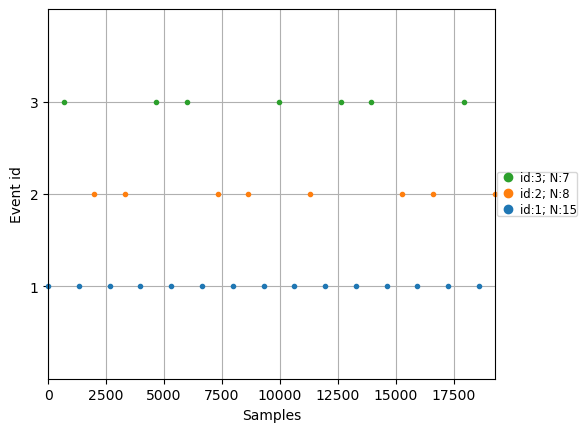

Not setting metadata
30 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 113 original time points ...
1 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components
Dropped 8 epochs: 3, 5, 11, 13, 17, 23, 24, 25


/var/folders/5s/vz4jl6gn7k14_p8jty4rgvwh0000gn/T/ipykernel_76646/2361809395.py:8: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


Using qt as 2D backend.
Using pyopengl with version 3.1.9


/var/folders/5s/vz4jl6gn7k14_p8jty4rgvwh0000gn/T/ipykernel_76646/2361809395.py:14: RuntimeWarning: This filename (../files/S001/S001R03_cleaned_epoched.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(sample_data_file[:-4] + '_cleaned_epoched.fif', overwrite=True)


[PosixPath('/Users/rusham/Documents/VinjamuriLabTings/ClassificationProject/Notebooks/../files/S001/S001R03_cleaned_epoched.fif')]

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [16]:
events, event_ids = mne.events_from_annotations(raw)

# we can visualize by...
mne.viz.plot_events(events[:100])

epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)

epochs = ica.apply(epochs, exclude=ica.exclude)

epochs.equalize_event_counts(event_ids)

epochs.plot()

epochs.save(sample_data_file[:-4] + '_cleaned_epoched.fif', overwrite=True)